In [13]:
 pip install -U sentence-transformers

In [14]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

'''
Variables:
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension)
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters

''';

In [15]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list
        p : number of dimensions to keep
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''

    # Apply TSNE for dimensionality reduction
    tsne = TSNE(n_components=p, random_state=42)
    red_mat = tsne.fit_transform(mat)

    red_mat = mat[:,:p]

    return red_mat

In [16]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''

    kmeans = KMeans(n_clusters=k, random_state=42)
    predictions = kmeans.fit_predict(mat)
    return predictions

    pred = kmeans.labels_

    return pred
    #pred = np.random.randint(k, size=len(corpus))

    #return pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


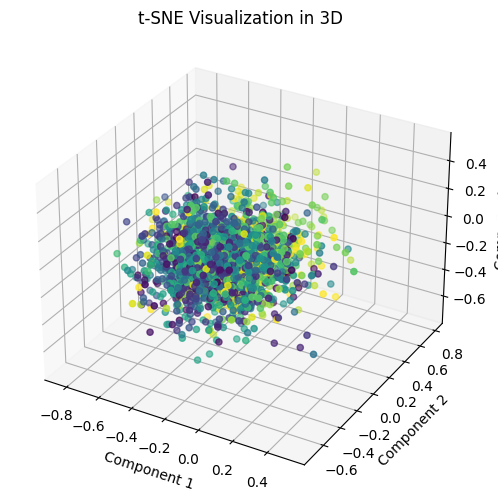

NMI: 0.10 
ARI: 0.02


In [17]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 3)
# perform clustering
pred = clust(red_emb, k)

tsne_df = pd.DataFrame(data=red_emb, columns=['Component 1', 'Component 2', 'Component 3'])
tsne_df['Labels'] = labels

# Plotting in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot
ax.scatter(tsne_df['Component 1'], tsne_df['Component 2'], tsne_df['Component 3'], c=tsne_df['Labels'], cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('t-SNE Visualization in 3D')
plt.show()

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')
